In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Este conjunto de datos es una colección de 30000 productos de moda femenina. Las categorías cubiertas en este conjunto de datos son ropa occidental, ropa india, perfumes y fragancias, relojes y ropa de dormir.

La descripción de la columna se menciona a continuación:
BrandName: Menciona la marca del producto
Details: Detalles sobre el producto
Size: Tamaños disponibles
MRP: Este es el precio minorista máximo 
SellPrice: Este es el precio después del descuento
Category: Categoría del producto El valor de
Nan es un valor nulo

# Realizando proceso de ETL

In [2]:
data = pd.read_csv('/work/FashionDataset.csv')
df = pd.DataFrame(data)
df.head()

,Unnamed: 0,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30758 entries, 0 to 30757
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30758 non-null  int64 
 1   BrandName   30758 non-null  object
 2   Deatils     30758 non-null  object
 3   Sizes       30758 non-null  object
 4   MRP         30758 non-null  object
 5   SellPrice   30758 non-null  object
 6   Discount    30758 non-null  object
 7   Category    30758 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.9+ MB


In [4]:
df_ETL = df

In [5]:
del df_ETL['Unnamed: 0']
del df_ETL['Sizes']
del df_ETL['Discount']

In [6]:
df_ETL.head(5)

,BrandName,Deatils,MRP,SellPrice,Category
0,life,solid cotton blend collar neck womens a-line d...,Rs\n1699,849,Westernwear-Women
1,only,polyester peter pan collar womens blouson dres...,Rs\n3499,2449,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular...,Rs\n1199,599,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress...,Rs\n2299,1379,Westernwear-Women
4,life,regular fit regular length denim womens jeans ...,Rs\n1699,849,Westernwear-Women


In [7]:
df_ETL.replace('Nan',np.nan,inplace=True)
df_ETL.dropna(axis=0,inplace=True)

In [8]:
df_ETL.drop_duplicates()

,BrandName,Deatils,MRP,SellPrice,Category
0,life,solid cotton blend collar neck womens a-line d...,Rs\n1699,849,Westernwear-Women
1,only,polyester peter pan collar womens blouson dres...,Rs\n3499,2449,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular...,Rs\n1199,599,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress...,Rs\n2299,1379,Westernwear-Women
4,life,regular fit regular length denim womens jeans ...,Rs\n1699,849,Westernwear-Women
...,...,...,...,...,...
30746,jewelz,beautiful white crystal silver plated earrings,Rs\n1739,608,Jewellery-Women
30747,ayesha,womens metallic gold statement multilayered ch...,Rs\n798,399,Jewellery-Women
30748,jewelz,nine pieces combo fashion non-precious metal b...,Rs\n1339,468,Jewellery-Women
30749,pretty women,womens pearl golden drops,Rs\n449,381,Jewellery-Women


<AxesSubplot:>

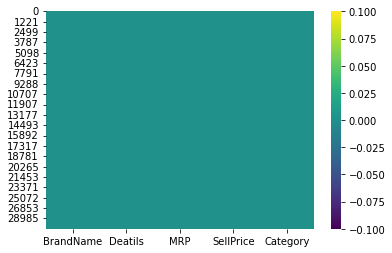

In [9]:
sns.heatmap(df_ETL.isnull(), cmap='viridis')

Cambiando la interpretación de las columnas RPM y Sellprice 

In [10]:
df_ETL['MRP']= df_ETL['MRP'].str.replace('Rs','')
df_ETL['MRP']= df_ETL['MRP'].astype(int)
df_ETL['SellPrice'] = df_ETL['SellPrice'].astype(int)
df_ETL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22550 entries, 0 to 30755
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   BrandName  22550 non-null  object
 1   Deatils    22550 non-null  object
 2   MRP        22550 non-null  int64 
 3   SellPrice  22550 non-null  int64 
 4   Category   22550 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.0+ MB


# Análisis de datos

In [11]:
df_A = df_ETL
df_A.head(5)

,BrandName,Deatils,MRP,SellPrice,Category
0,life,solid cotton blend collar neck womens a-line d...,1699,849,Westernwear-Women
1,only,polyester peter pan collar womens blouson dres...,3499,2449,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular...,1199,599,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress...,2299,1379,Westernwear-Women
4,life,regular fit regular length denim womens jeans ...,1699,849,Westernwear-Women


In [12]:
#revisando datos estadisticos.
df_A.describe()

,MRP,SellPrice
count,22550.000000,22550.000000
mean,2644.677295,1472.929268
std,2322.499186,1567.185295
min,149.000000,74.000000
25%,1399.000000,699.000000
50%,1999.000000,1079.000000
75%,3099.000000,1749.000000
max,32995.000000,23996.000000


## Análisis de ganancias antes y después del descuento

In [13]:
#Viendo las categorias
df_A['Category'].value_counts()

Indianwear-Women            8292
Westernwear-Women           8278
Lingerie&Nightwear-Women    2093
Footwear-Women              1638
Jewellery-Women             1086
Watches-Women                976
Fragrance-Women              187
Name: Category, dtype: int64

In [14]:
dfgan =df_A.groupby('Category').sum().reset_index()
dfgan

,Category,MRP,SellPrice
0,Footwear-Women,4488829,2730740
1,Fragrance-Women,708112,562713
2,Indianwear-Women,23399079,11189242
3,Jewellery-Women,2455875,1513068
4,Lingerie&Nightwear-Women,2639460,1556506
5,Watches-Women,9329732,6031822
6,Westernwear-Women,16616386,9630464


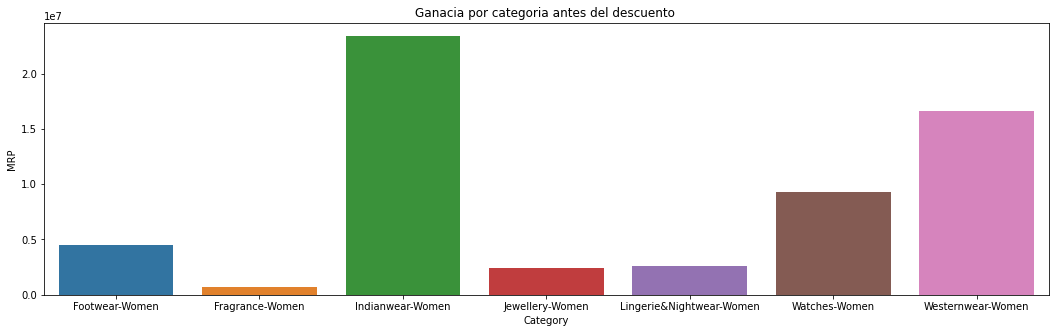

In [15]:
plt.figure(figsize=(18,5))
sns.barplot(x =dfgan['Category'] , y = dfgan['MRP'])
plt.title('Ganacia por categoria antes del descuento ')
plt.show()

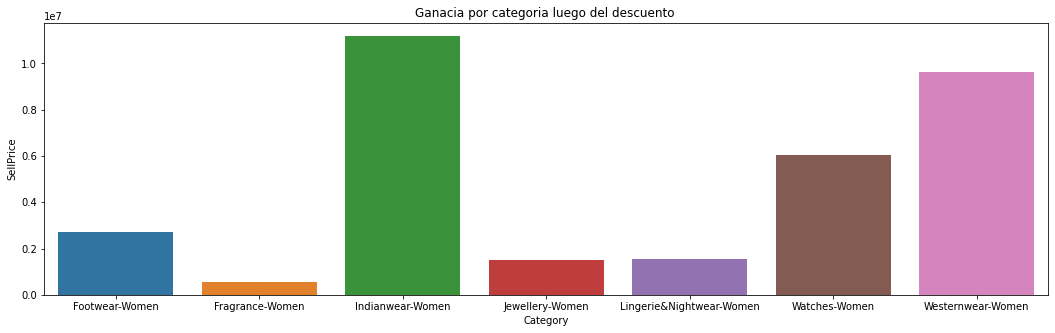

In [16]:
plt.figure(figsize=(18,5))
sns.barplot(x =dfgan['Category'] , y = dfgan['SellPrice'])
plt.title('Ganacia por categoria luego del descuento ')
plt.show()

Podemos ver que las categorias que mas ganancia generaron para el E-commerce fueron 3

- Indianwear-Women

- Westernwear-Women

- Watches-Women

Algo que también pudimos observar, es que aunque estas 3 fueron las categorías que mas dieron beneficio, el mismo se vio fuertemente disminuido luego de los descuentos.

In [17]:
#Resta de MRP - SellPrice
dfgan['MRP-SellPrice'] = dfgan['MRP'] - dfgan['SellPrice']
dfgan

,Category,MRP,SellPrice,MRP-SellPrice
0,Footwear-Women,4488829,2730740,1758089
1,Fragrance-Women,708112,562713,145399
2,Indianwear-Women,23399079,11189242,12209837
3,Jewellery-Women,2455875,1513068,942807
4,Lingerie&Nightwear-Women,2639460,1556506,1082954
5,Watches-Women,9329732,6031822,3297910
6,Westernwear-Women,16616386,9630464,6985922


Tomando otra vez las 3 categorías principales, podemos ver la cantidad de beneficio que se perdió en cada categoria.

- Indianwear-Women  perdio un total de 12.209.837$

- Westernwear-Women perdio un total de 6.985.922$

- Watches-Women perdio un total de 3.297.910$

Aunque el beneficio en si es muy grande, abría que revisar que tan rentable es esto para el E-commerce en cuestión o ver que otras estrategias podrían usarse para disminuir el uso de descuentos en los productos.

## Análisis de ganancias por marca

In [18]:
df_A

,BrandName,Deatils,MRP,SellPrice,Category
0,life,solid cotton blend collar neck womens a-line d...,1699,849,Westernwear-Women
1,only,polyester peter pan collar womens blouson dres...,3499,2449,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular...,1199,599,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress...,2299,1379,Westernwear-Women
4,life,regular fit regular length denim womens jeans ...,1699,849,Westernwear-Women
...,...,...,...,...,...
30746,jewelz,beautiful white crystal silver plated earrings,1739,608,Jewellery-Women
30747,ayesha,womens metallic gold statement multilayered ch...,798,399,Jewellery-Women
30748,jewelz,nine pieces combo fashion non-precious metal b...,1339,468,Jewellery-Women
30749,pretty women,womens pearl golden drops,449,381,Jewellery-Women


In [19]:
df_A['BrandName'].value_counts()

vastranand           1541
zink london           918
global desi           819
janasya               751
stop                  722
                     ... 
indian terrain          1
unknown by ayesha       1
ed hardy                1
mothercare              1
elliza donatein         1
Name: BrandName, Length: 177, dtype: int64

In [20]:
df_mar =df_A.groupby('BrandName').sum().reset_index()
df_mar

,BrandName,MRP,SellPrice
0,109f,133024,52054
1,4711,3900,3120
2,aarke,1900,1140
3,abercrombie & fitch,20800,16440
4,adidas,363348,235778
...,...,...,...
172,w,756339,456069
173,wacoal,77750,49513
174,yuris,1095875,435260
175,zink london,1974932,964152


In [21]:
profit = df_mar.sort_values('SellPrice', ascending=False)
profit

,BrandName,MRP,SellPrice
168,vastranand,6933278,3356583
61,global desi,2060386,1251831
24,casio,1389535,1083883
11,and,1546676,1010276
175,zink london,1974932,964152
...,...,...,...
106,mothercare,1399,699
87,lavie,1298,648
57,gas,2499,624
164,unknown by ayesha,1198,359


In [22]:
#tomando las 5 marcas que generaron mas profit 
df_mar2 = profit.head(5)
df_mar2

,BrandName,MRP,SellPrice
168,vastranand,6933278,3356583
61,global desi,2060386,1251831
24,casio,1389535,1083883
11,and,1546676,1010276
175,zink london,1974932,964152


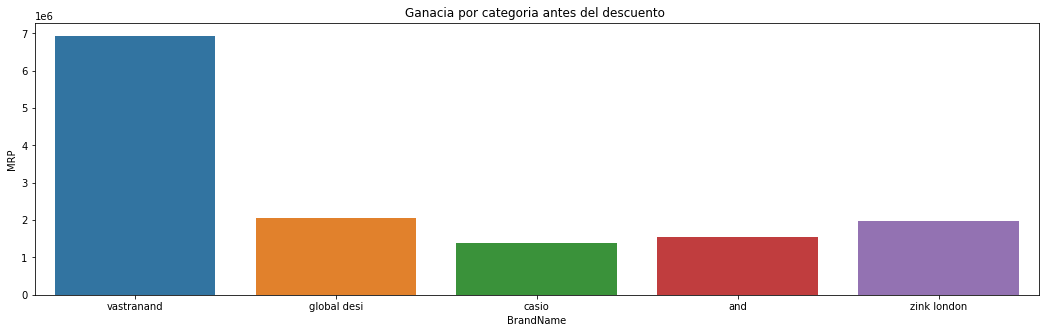

In [23]:
plt.figure(figsize=(18,5))
sns.barplot(x =df_mar2['BrandName'] , y = df_mar2['MRP'])
plt.title('Ganacia por marca antes del descuento ')
plt.show()

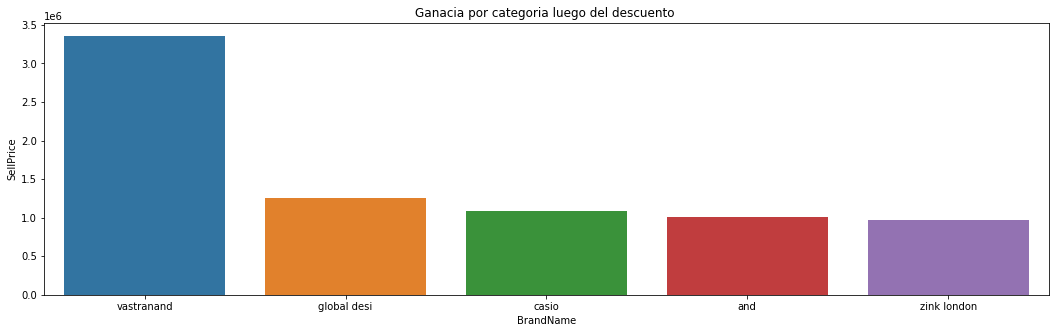

In [25]:
plt.figure(figsize=(18,5))
sns.barplot(x =df_mar2['BrandName'] , y = df_mar2['SellPrice'])
plt.title('Ganacia por marca luego del descuento ')
plt.show()

In [24]:
#Resta de MRP - SellPrice
df_mar2['MRP-SellPrice'] = df_mar2['MRP'] - df_mar2['SellPrice']
df_mar2

/tmp/ipykernel_86/3278994044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mar2['MRP-SellPrice'] = df_mar2['MRP'] - df_mar2['SellPrice']


,BrandName,MRP,SellPrice,MRP-SellPrice
168,vastranand,6933278,3356583,3576695
61,global desi,2060386,1251831,808555
24,casio,1389535,1083883,305652
11,and,1546676,1010276,536400
175,zink london,1974932,964152,1010780


Podemos observar cuanto fue la perdida de profit luego de hacerse los descuentos en estas marcas. 

# conclusión 

Logramos ver la cantidad de dinero que se genero por categoría enseñándonos así las mas rentables, lo mismo logramos ver con las marcas, aunque solo tomamos el top 5 de marcas que generaron mas beneficio. 

También se vio cuanto profit se perdió por categoría y por marca siendo la categoría que mas perdió dinero:

- Indianwear-Women con un total de 12.209.837$ de beneficio perdido. 

y la marca que perdió mas beneficio por descuentos fue: 

vastranand con un total de 3.576.695$

Sin embargo eso no quiere decir que las ventas hayan sido malas, pero nos supone preguntarnos si se pueden generar estrategias que nos ayuden a prescindir de los descuentos y así obtener mas profit de dichos artículos.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c49f7479-868a-4378-b527-1b5401baf4d5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>